# Analyses quantitatives des données RNA-seq HHV8 : (STAR)

In [37]:
#jupyter nbconvert --to html  --TagRemovePreprocessor.remove_input_tags='{"hide_code"}' differential_analysis_STAR.ipynb --output=differential_analysis_STAR_explic.html

import os
import pandas as pd

count_dir = "./count_star"
output_matrix = "./count_star/gene_count_matrix_STAR.csv"

files = [f for f in os.listdir(count_dir) if f.endswith("_ReadsPerGene.out.tab")]
dfs = []

for file in files:
    sample_name = file.replace("_not_hg38_ReadsPerGene.out.tab", "")  
    path = os.path.join(count_dir, file)


    df = pd.read_csv(path, sep='\t', skiprows=1, header=None)


    if len(df.columns) < 2:
        logging.warning(f"Fichier {file} a seulement {len(df.columns)} colonnes → skip")
        continue

    # Geneid + dernier colonne = nmb de reads
    df.columns = ['Geneid'] + [f"col{i}" for i in range(1, len(df.columns))]
    df = df[['Geneid', df.columns[-1]]]
    df.columns = ['Geneid', sample_name]

    dfs.append(df.set_index('Geneid'))

combined_df = pd.concat(dfs, axis=1)

# rm les  "unassigned"
gene_mask = ~combined_df.index.str.contains("N_", na=True) & ~combined_df.index.str.contains("unassigned", na=True)
combined_df = combined_df[gene_mask]


combined_df.to_csv(output_matrix)
print(f"Matrice Done  : {output_matrix}")

Matrice Done  : ./count_star/gene_count_matrix_STAR.csv


In [38]:

#Charger les data et librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


matrix_path = "./count_star/gene_count_matrix_STAR.csv"
df_counts = pd.read_csv(matrix_path, index_col=0)

#print("Dimensions:", df_counts.shape)
print("Extrait de 10 ech de matrice counts STAR:")

pd.set_option('display.max_rows', None)
display(df_counts.iloc[:, :10])
pd.reset_option('display.max_rows')


Extrait de 10 ech de matrice counts STAR:


,KAP_53_S11,KAP_74_S3,KAP_41_S2,KAP_40_S3,KAP_37_S1,KAP_65_2_S2,KAP38_S3,KAP_67_S5,KAP_42_1_S4,KAP_68_S9
Geneid,,,,,,,,,,
HHV8GK18_gp01,0,12,0,0,0,0,3,0,0,0
HHV8_gs01,0,0,0,0,12,0,2,0,0,0
HHV8GK18_gp38,0,0,0,0,0,0,0,0,0,0
HHV8GK18_gp39,0,0,0,0,0,0,0,0,0,0
HHV8GK18_gp62,0,0,0,1,0,0,1,0,0,0
HHV8GK18_gp63,0,13,0,0,1,0,21,0,0,0
HHV8GK18_gp64,0,14,0,1,0,0,10,0,0,0
HHV8GK18_gp65,0,6,0,1,2,0,17,0,0,0
HHV8GK18_gp79,0,762,0,152,1004,0,9121,0,0,0


Statistiques par échantillon


,Total Reads,Moyenne par gène,Médiane par gène
KAP_62_2_S1,61449,3413.833333,93.5
KAP32_S1,48918,2717.666667,76.0
KAP_63_S5,27976,1554.222222,44.0
KAP_45_S7,22586,1254.777778,16.5
KAP51_S5,18866,1048.111111,76.0
KAP38_S3,9569,531.611111,19.0
KAP_33_S1,5894,327.444444,5.5
KAP_37_S2,3372,187.333333,3.0
KAP_64_S6,3026,168.111111,4.0
KAP39_S4,2114,117.444444,3.5


/tmp/ipykernel_1622912/2202026603.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")


Histogramme : nombre total de reads par échantillon


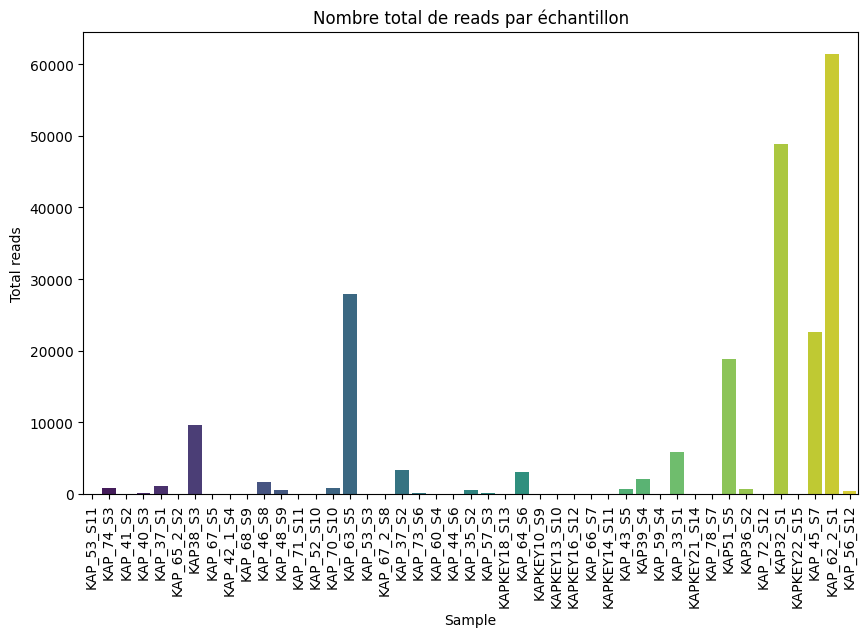

In [39]:

#Tableau : Nombre total de reads par échantillon + Graphique

# total de reads par sample
total_reads_per_sample = df_counts.sum().to_frame(name="Total Reads")
total_reads_per_sample["Moyenne par gène"] = df_counts.mean()
total_reads_per_sample["Médiane par gène"] = df_counts.median()

print("Statistiques par échantillon")
display(total_reads_per_sample.sort_values(by="Total Reads", ascending=False))
#test modifiy os
# Histogramme
plt.figure(figsize=(10,6))
sns.barplot(x=total_reads_per_sample.index, y="Total Reads", data=total_reads_per_sample, palette="viridis")
plt.xticks(rotation=90)
plt.title("Nombre total de reads par échantillon")
plt.xlabel("Sample")
plt.ylabel("Total reads")
print("Histogramme : nombre total de reads par échantillon")
plt.show()


### Interprétation du tableau et du graphique

Le tableau présente, pour chaque échantillon, le nombre total de reads alignés sur les gènes HHV-8, ainsi que la moyenne et la médiane d'expression par gène. On observe une forte hétérogénéité entre les échantillons : certains (ex. KAP_62_2_S1, KAP32_S1, KAP51_S5) présentent un nombre très élevé de reads, traduisant une forte expression virale, tandis que d'autres ont une expression quasi nulle.

Le graphique associé (barplot) illustre visuellement cette distribution, mettant en évidence les échantillons à forte charge virale. 


In [40]:

# Dictionnaire : identifiant eeee abréviation/fonction
print("Affichage des gènes présents dans df_counts avec leur abréviation NCBI")
gene_abbr = {
    "HHV8GK18_gp01": "K1",
    "HHV8_gs01": "miscRNA01",
    "HHV8GK18_gp39": "ORF35",
    "HHV8GK18_gp38": "ORF34",
    "HHV8GK18_gp62": "vIRF-1 (K9)",
    "HHV8GK18_gp63": "vIRF-4",
    "HHV8GK18_gp64": "vIRF-3",
    "HHV8GK18_gp65": "vIRF-2",
    "HHV8GK18_gp79": "K12",
    "HHV8_gs02": "miscRNA02",
    "HHV8_gs03": "miscRNA03",
    "HHV8_gs04": "miscRNA04",
    "HHV8_gs05": "miscRNA05",
    "HHV8_gs06": "miscRNA06",
    "HHV8_gs07": "miscRNA07",
    "HHV8_gs08": "miscRNA08",
    "HHV8_gs09": "miscRNA09",
    "HHV8_gs10": "miscRNA10"
}
# Afficher tous les gènes présents dans df_counts avec leur abréviation
gene_table = pd.DataFrame({
    "Geneid": df_counts.index,
    "Abréviation NCBI": [gene_abbr.get(g, "") for g in df_counts.index]
})


display(gene_table)


Affichage des gènes présents dans df_counts avec leur abréviation NCBI


,Geneid,Abréviation NCBI
0,HHV8GK18_gp01,K1
1,HHV8_gs01,miscRNA01
2,HHV8GK18_gp38,ORF34
3,HHV8GK18_gp39,ORF35
4,HHV8GK18_gp62,vIRF-1 (K9)
5,HHV8GK18_gp63,vIRF-4
6,HHV8GK18_gp64,vIRF-3
7,HHV8GK18_gp65,vIRF-2
8,HHV8GK18_gp79,K12
9,HHV8_gs02,miscRNA02



Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    4204.933333
HHV8_gs01         341.244444
HHV8GK18_gp65      22.866667
HHV8_gs02          19.733333
HHV8GK18_gp64      16.444444
HHV8_gs06          16.000000
HHV8_gs03          15.733333
HHV8GK18_gp63      12.622222
HHV8_gs04          12.066667
HHV8_gs05          10.222222
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

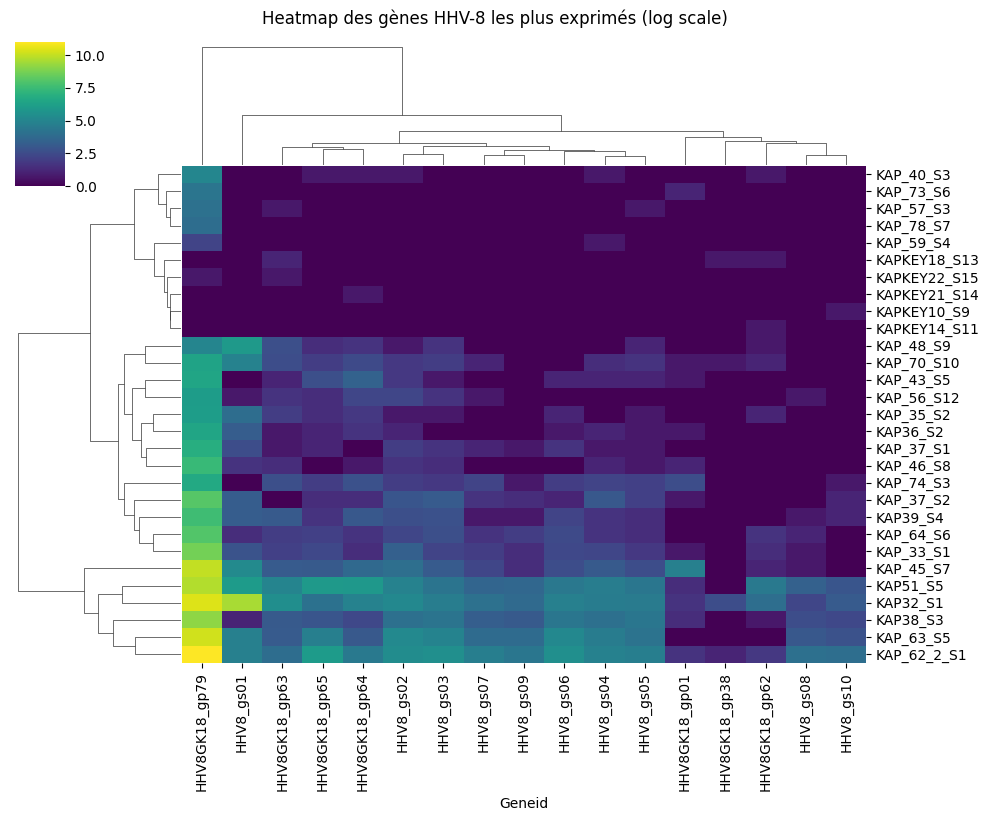


1 gènes sans expression :
['HHV8GK18_gp39']


In [41]:
# Moyenne d'expression par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))

# plot :

df_filtered = df_counts.loc[:, df_counts.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

#heatmap
df_log = df_top_genes.apply(lambda x: np.log(x + 1))

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (log scale)", y=1.02)
plt.show()

zero_genes = df_counts[df_counts.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])


### Interprétation du tableau et du graphique des gènes les plus exprimés

Tableau : Pour chaque échantillon, les niveaux d’expression des 17 gènes HHV-8 les plus exprimés. 
Forte hétérogénéité entre les éch, certains présentant des niveaux d’expression très élevés (ex. KAP_62_2_S1, KAP32_S1, KAP51_S5), tandis que d’autres montrent une expression quasi nulle pour la majorité des gènes.

Le heatmap associé permet de visualiser cette variabilité :  
- Les échantillons à forte charge virale se distinguent par des couleurs plus intenses sur plusieurs gènes.
- Certains gènes, comme HHV8GK18_gp79 (K12) ou HHV8_gs01 (miscRNA01), sont particulièrement exprimés dans certains échantillons, traduisant une possible activation différentielle de régions du génome viral.
- À l’inverse, certains gènes restent faiblement exprimés ou absents dans la plupart des échantillons.
À noter : un gène (HHV8GK18_gp39) n’est pas exprimé dans ce jeu de données.



Gènes les plus exprimés :
Geneid
HHV8GK18_gp79    4204.933333
HHV8_gs01         341.244444
HHV8GK18_gp65      22.866667
HHV8_gs02          19.733333
HHV8GK18_gp64      16.444444
HHV8_gs06          16.000000
HHV8_gs03          15.733333
HHV8GK18_gp63      12.622222
HHV8_gs04          12.066667
HHV8_gs05          10.222222
dtype: float64

Heatmap des gènes les plus exprimés (top 20):


<Figure size 1000x800 with 0 Axes>

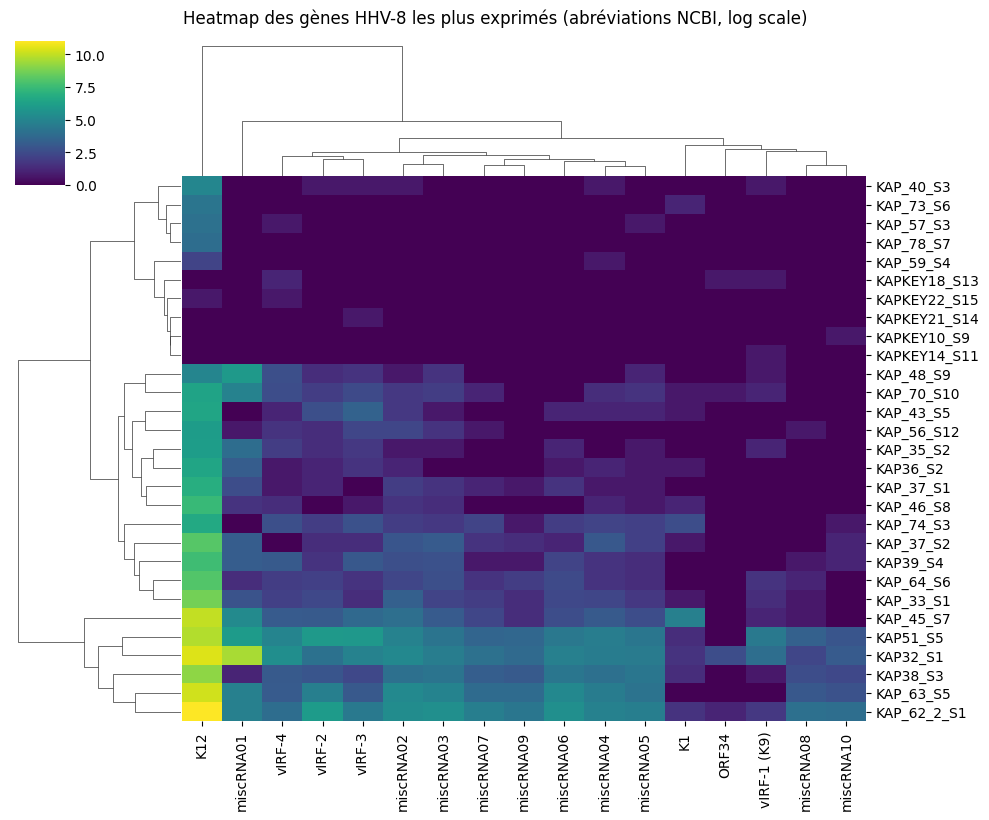


1 gènes sans expression :
['HHV8GK18_gp39']


In [47]:
# Moyenne d'expression par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)
print("\nGènes les plus exprimés :")
print(mean_expression.head(10))

# plot :

df_filtered = df_counts.loc[:, df_counts.sum() > 0]  
df_gene_sorted = df_filtered.T 

top_genes = mean_expression[mean_expression > 0].head(20).index.tolist()
df_top_genes = df_gene_sorted[top_genes]

# heatmap avec abréviations NCBI sur l'axe X
df_log = df_top_genes.apply(lambda x: np.log(x + 1))
gene_labels = [gene_abbr.get(g, g) for g in top_genes]
df_log.columns = gene_labels

plt.figure(figsize=(10, 8))
sns.clustermap(df_log, cmap="viridis", yticklabels=True, xticklabels=True, annot=False, figsize=(10, 8))
print("\nHeatmap des gènes les plus exprimés (top 20):")
plt.suptitle("Heatmap des gènes HHV-8 les plus exprimés (abréviations NCBI, log scale)", y=1.02)
plt.show()

zero_genes = df_counts[df_counts.sum(axis=1) == 0].index.tolist()
print(f"\n{len(zero_genes)} gènes sans expression :")
print(zero_genes[:10])

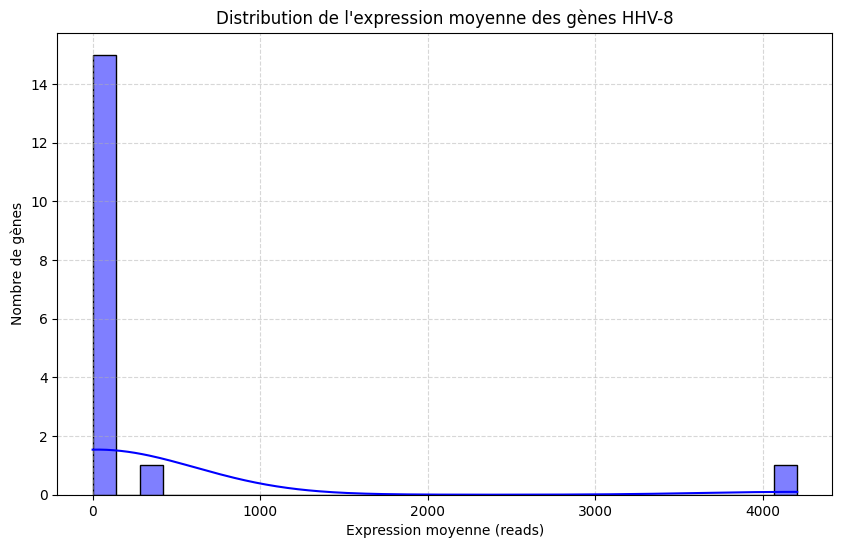

In [48]:
#Histogramme de l'expression moyenne des gènes
# Expression moyenne par gène
mean_expression = df_counts.mean(axis=1).sort_values(ascending=False)

mean_expression = mean_expression[mean_expression > 0]

# Histogramme
plt.figure(figsize=(10, 6))
sns.histplot(mean_expression, bins=30, kde=True, color='blue')
plt.xlabel("Expression moyenne (reads)")
plt.ylabel("Nombre de gènes")
plt.title("Distribution de l'expression moyenne des gènes HHV-8")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Interprétation de l'histogramme de l'expression moyenne des gènes

L’histogramme de l’expression moyenne des gènes HHV-8 montre une distribution très asymétrique : 
la majorité des gènes présentent une expression faible à modérée dans l’ensemble des échantillons,tandis que quelques gènes affichent des niveaux d’expression très élevés. 

PCA sur log-transformées


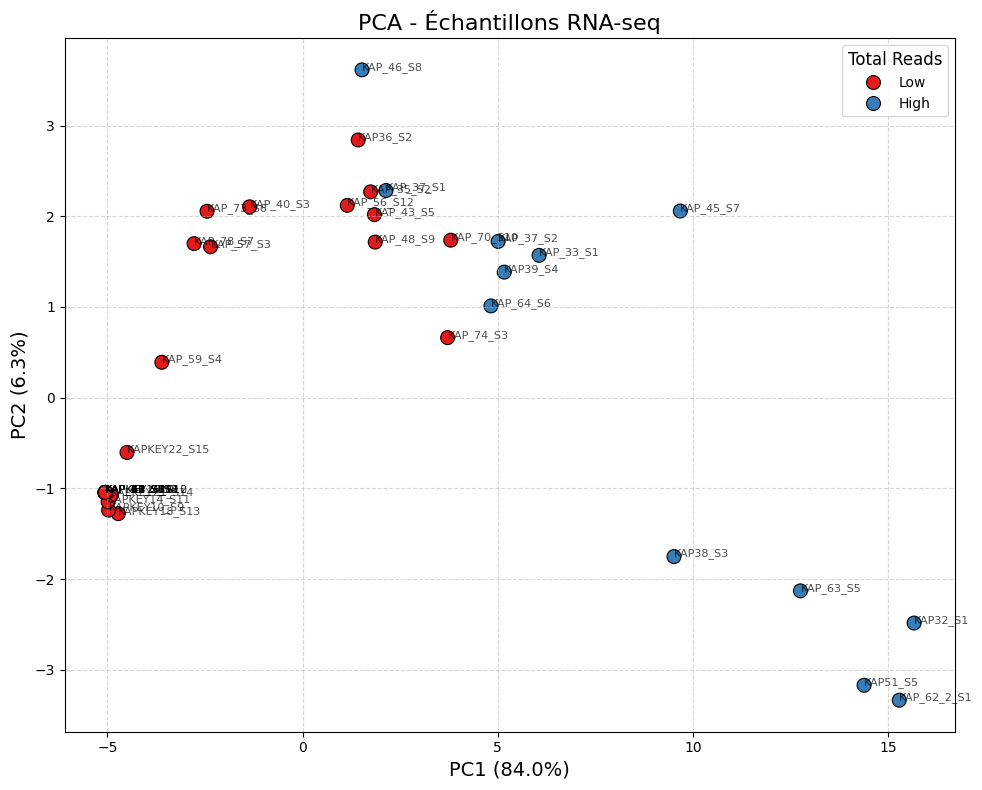

In [49]:
from sklearn.decomposition import PCA

# on va colorer selon si le total de reads est > 1000 ou non 
group = total_reads_per_sample["Total Reads"] > 1000
group = group.map({True: "High", False: "Low"})
log_df = df_counts.apply(lambda x: np.log(x + 1))

print("PCA sur log-transformées")
# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_df.T)

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=group, palette="Set1", s=100, edgecolor="k")
for i, txt in enumerate(df_counts.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]), fontsize=8, alpha=0.7)
plt.title("PCA - Échantillons RNA-seq", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=14)
plt.legend(title="Total Reads", title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Interprétation du graphique PCA

Le graphique PCA :
Colorer selon si le total de reads est > 1000 (High) ou non (Low).

Une séparation nette entre les échantillons à forte charge virale ("High") et ceux à faible charge ("Low"), traduisant des différences marquées dans l'expression des gènes viraux. 

Les échantillons fortement positifs se regroupent et se distinguent clairement des autres.

In [ ]:
from sklearn.decomposition import PCA

# on va colorer selon si le total de reads est > 1000 ou non 
group = total_reads_per_sample["Total Reads"] > 1000
group = group.map({True: "High", False: "Low"})

print("PCA sans log-transformée")
# PCA sans log-transformée
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_counts.T)  

plt.figure(figsize=(10,8))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], hue=group, palette="Set1", s=100, edgecolor="k")
for i, txt in enumerate(df_counts.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]), fontsize=8, alpha=0.7)
plt.title("PCA - Échantillons RNA-seq", fontsize=16)
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)", fontsize=14)
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)", fontsize=14)
plt.legend(title="Total Reads", title_fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

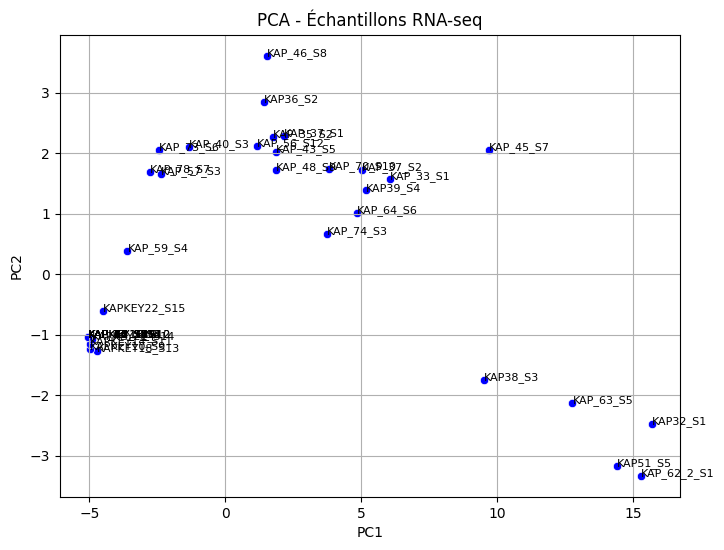

In [ ]:
from sklearn.decomposition import PCA
# Log transform
log_df = df_counts.apply(lambda x: np.log(x + 1))

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(log_df.T)  

# Plot 
plt.figure(figsize=(8,6))
sns.scatterplot(x=pca_result[:,0], y=pca_result[:,1], color='blue')
for i, txt in enumerate(df_counts.columns):
    plt.annotate(txt, (pca_result[i,0], pca_result[i,1]), fontsize=8)
plt.title("PCA - Échantillons RNA-seq")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()